### **Alexandr Voronovich**

#### **Titanic data set**

In [102]:
import pandas as pd

In [103]:
import seaborn as sns

In [104]:
import matplotlib.pyplot as plt

In [105]:
data = pd.read_csv('titanic.csv')

In [124]:
data # statistical overview for numerical columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### **Check quick stats for numeric columns**

In [107]:
described_data = data.describe()
described_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### **Separate numerical and categorical data**

In [108]:
numerical_data = data.select_dtypes(include='number')
categorical_data = data.select_dtypes(exclude='number')

In [109]:
numerical_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [110]:
categorical_data

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


#### **1-dimensional histograms of each variable of the data**

#### **numerical variable**

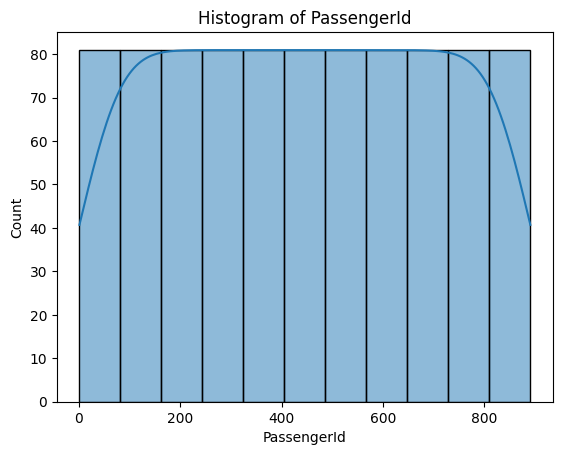

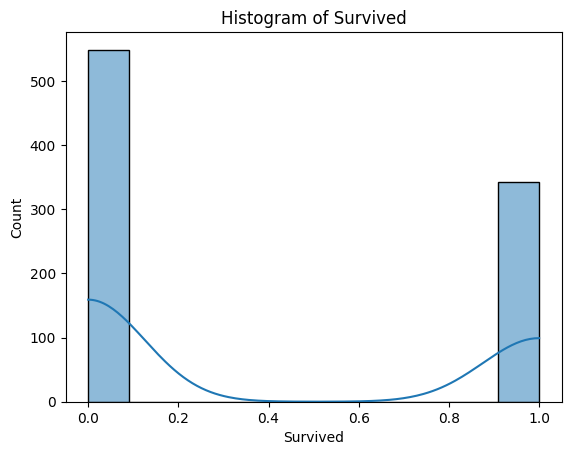

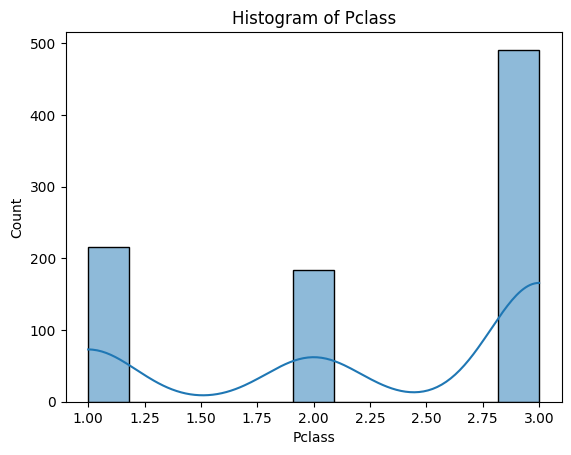

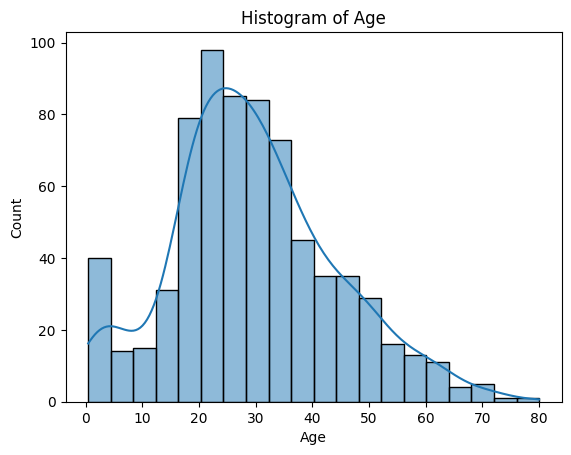

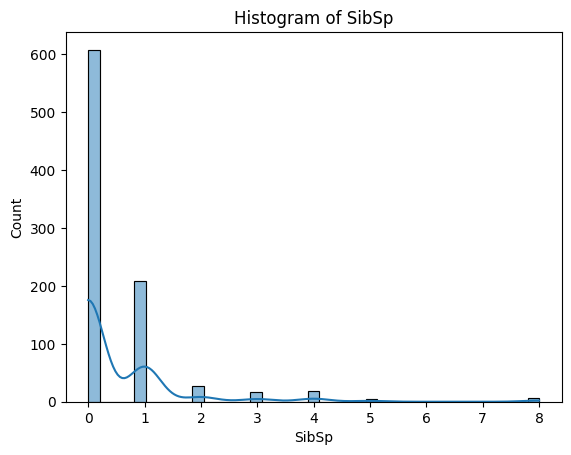

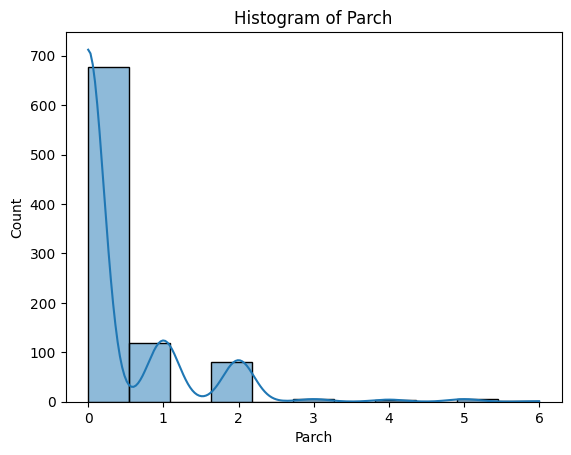

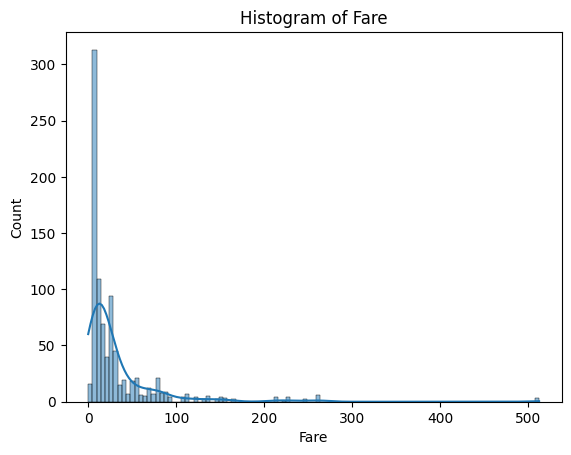

In [125]:
for col in numerical_data.columns:
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

#### **categorical variables**

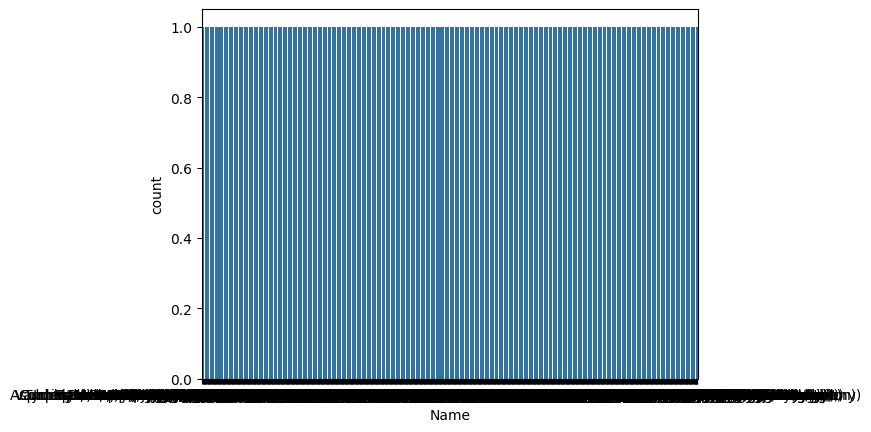

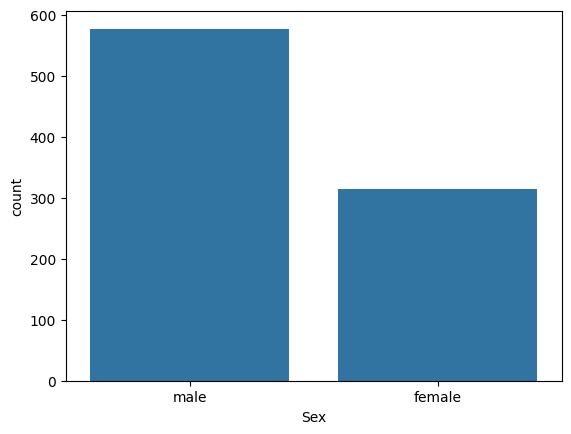

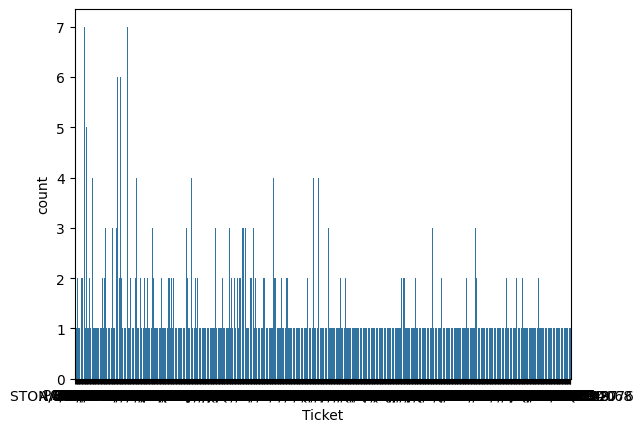

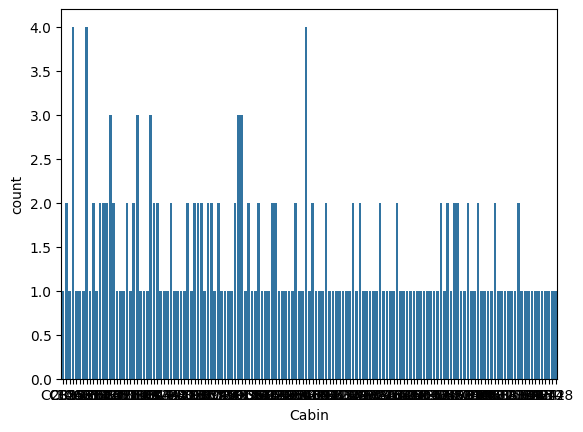

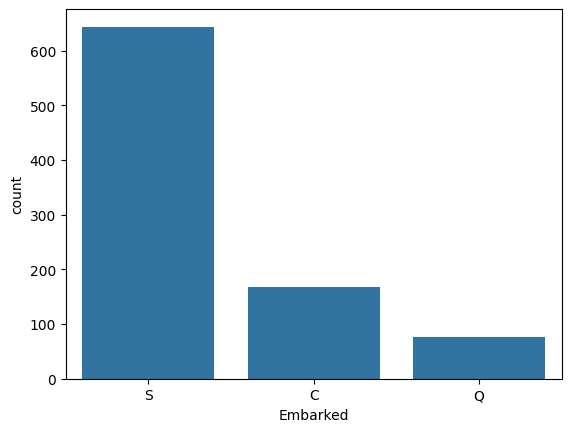

In [112]:
for col in categorical_data.columns:
  sns.countplot(data=data, x=col)
  plt.show()

#### **Summary(min,max,median,mean)**

In [113]:
summary = pd.DataFrame()
summary['min'] = numerical_data.min()
summary['max'] = numerical_data.max()
summary['median'] = numerical_data.median()
summary['mean'] = numerical_data.mean()


In [114]:
summary['Q1'] = numerical_data.quantile(0.25)
summary['Q3'] = numerical_data.quantile(0.75)
summary['IQR'] = summary['Q3'] - summary['Q1']

#### **Function to count outliers based on IQR rule**

In [115]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

summary['outliers_count'] = numerical_data.apply(count_outliers)

In [116]:
print(summary[['min','max','median','mean','outliers_count']])

              min       max    median        mean  outliers_count
PassengerId  1.00  891.0000  446.0000  446.000000               0
Survived     0.00    1.0000    0.0000    0.383838               0
Pclass       1.00    3.0000    3.0000    2.308642               0
Age          0.42   80.0000   28.0000   29.699118              11
SibSp        0.00    8.0000    0.0000    0.523008              46
Parch        0.00    6.0000    0.0000    0.381594             213
Fare         0.00  512.3292   14.4542   32.204208             116


#### **Plot**

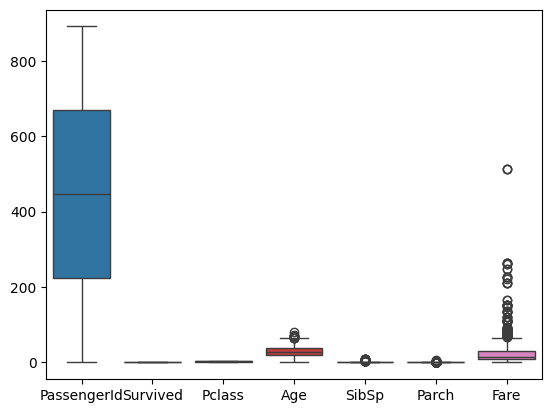

In [117]:
sns.boxplot(data=data)
plt.show()

#### **pair-wise relationships with a matrix of scatter plots for the numerical data only**

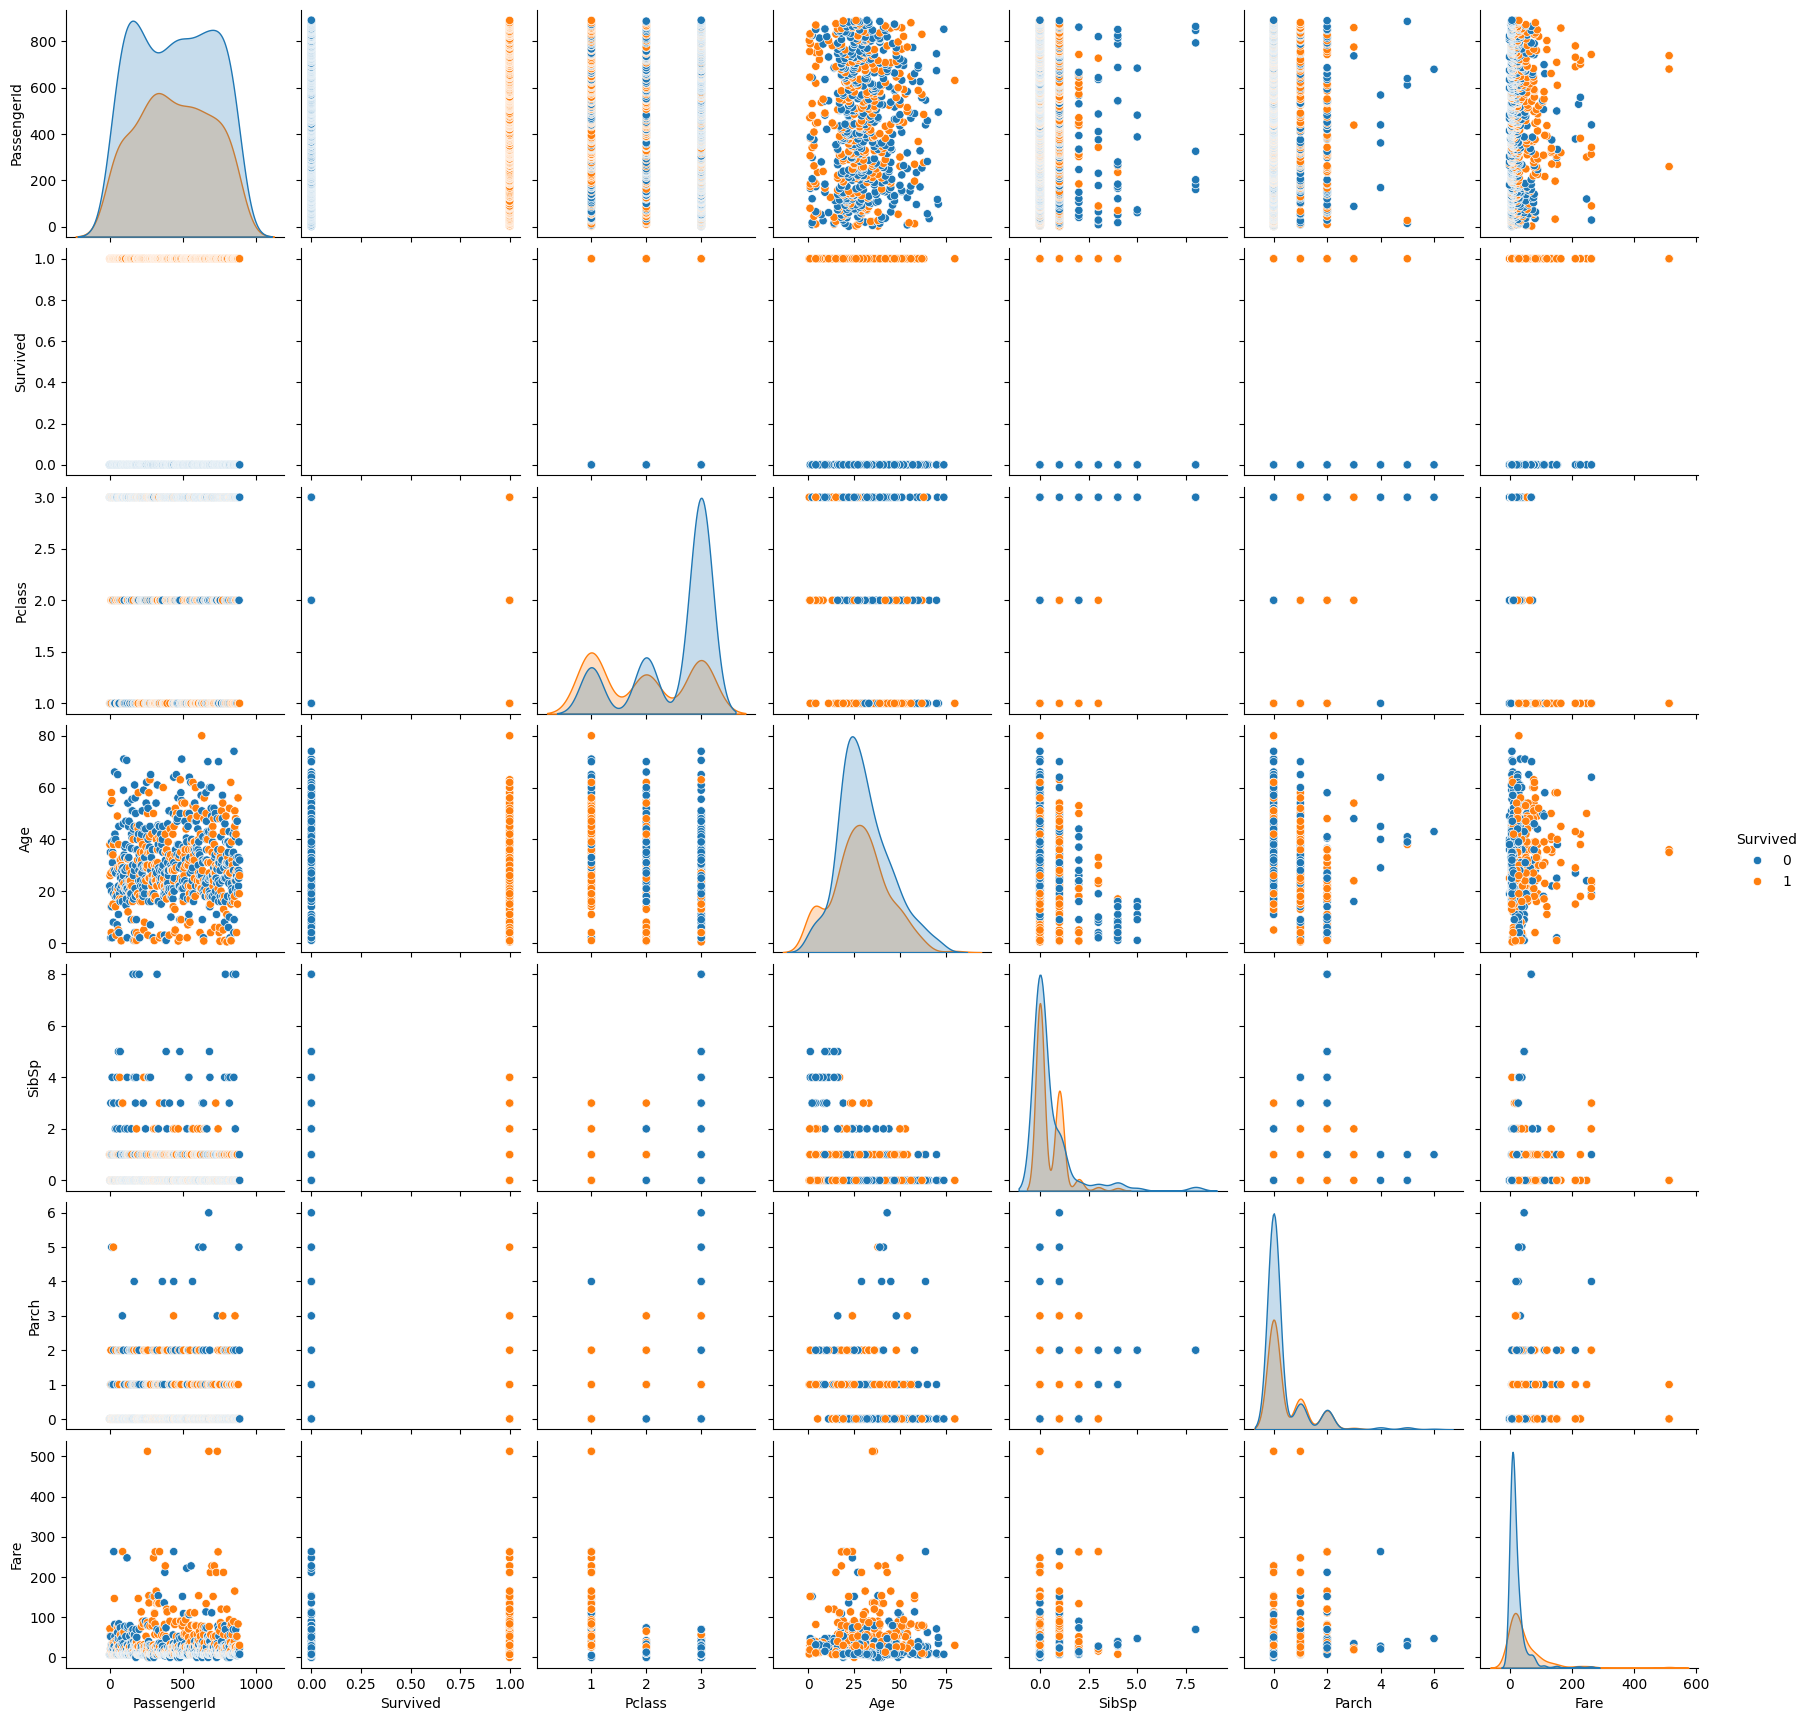

In [119]:
sns.pairplot(data, vars=numerical_data.columns, hue="Survived")
plt.show()

#### **Categorical vs Categorical data**

#### **How gender relates to survival**

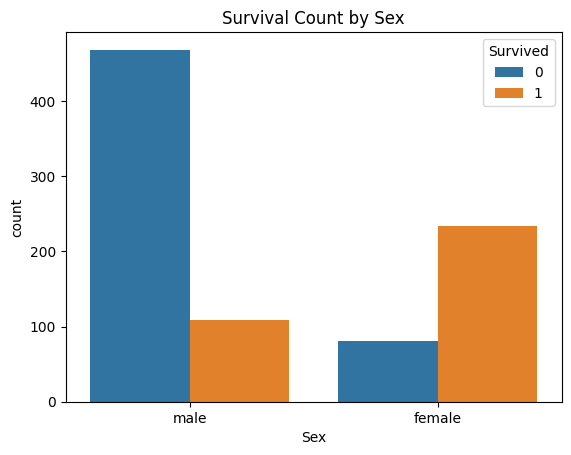

In [120]:
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.show()

In [121]:
pd.crosstab(data['Sex'], data['Survived'], normalize='index') # Crosstab gives survival rate by gender


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


#### **Categorical vs Numerical data (using color or boxplots)**

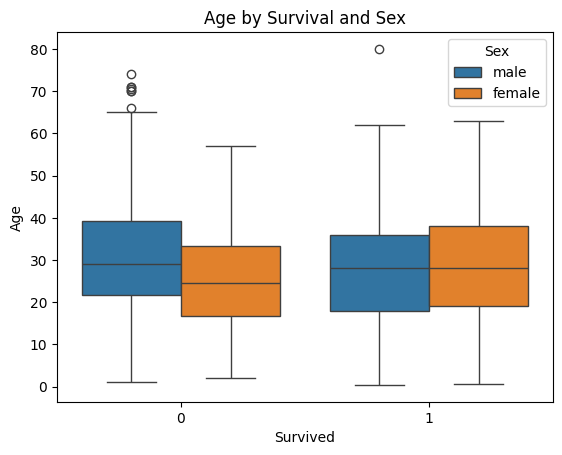

In [123]:
sns.boxplot(x='Survived', y='Age', hue='Sex', data=data)
plt.title('Age by Survival and Sex')
plt.show()

#### **Scatter plot colored by survival**

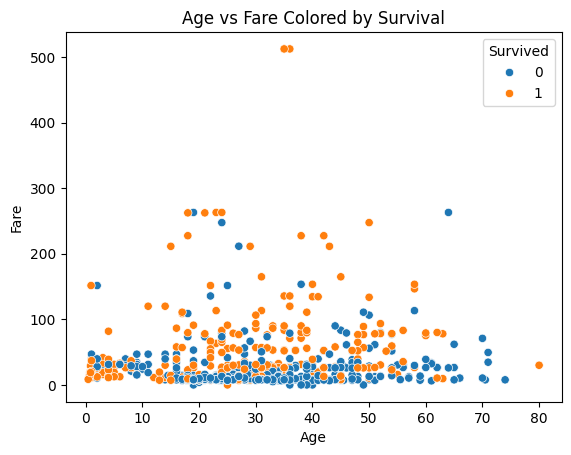

In [129]:
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare Colored by Survival')
plt.show()